In [1]:
import llh_defs.multinomial as mn_standard
import numpy
import scipy.special
import pylab

In [2]:
### two bins with uneven pseudo MonteCarlo weight distribution -> plot finite-sample binomial distribution as special case of finite-sample 
### multinomial.. just because it is possible

# sum weights first bin: 4.0  - 3 weighted events total
weights_bin1=numpy.array([1.0,0.2,2.8])
#weights_bin1=numpy.array([1.0,1.0,1.0])

# sum weights second bin: 2.0 - 4 weighted events total
weights_bin2=numpy.array([0.3,0.4,0.5, 0.8])
#weights_bin2=numpy.array([0.2,0.2,0.2, 0.2])
weight_list=[weights_bin1, weights_bin2]

index_list=[]
total_weight_array=[]

for ind in range(len(weight_list)):
    index_list.append(len(total_weight_array)+numpy.arange(len(weight_list[ind])))
    total_weight_array.extend(weight_list[ind].tolist())
    
    
total_weight_array=numpy.array(total_weight_array)


avg_w_1=sum(weights_bin1)/float(len(weights_bin1))
avg_w_2=sum(weights_bin2)/float(len(weights_bin2))

avg_weight_list=[numpy.ones(len(weights_bin1))*avg_w_1, numpy.ones(len(weights_bin1))*avg_w_2]


mnomial_standard_infinite=[] # stores probs for eq. 2
mnomial_equal_weights_per_bin=[] # stores probs for eq. 33
mnomial_general_weights=[] # stores probs for eq. 35

mnomial_ratio_equal_weights=[] # stores probs for eq. 42
mnomial_ratio_general_weights=[] # stores probs for eq. 43


tot_k=10
mn_general_fn=mn_standard.log_multinomial_general_weights_generator(tot_k, weight_list, nthrows=10000, prior_factor=0.0)

for i in range(tot_k+1):
    k1=i
    k2=tot_k-i
    
    obs_k=numpy.array([k1,k2])
    
    
    
    ## cNow alculate probabilities for different Multinomial-like formulas
    
    mnomial_standard_infinite.append(mn_standard.multinomial_standard(obs_k, numpy.array([sum(weights_bin1), sum(weights_bin2)] )))
    mnomial_equal_weights_per_bin.append(mn_standard.log_multinomial_equal_weights(obs_k, numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([avg_w_1, avg_w_2]), nthrows=1000000, prior_factor=0,integral_type="standard_lauricella"))
    mnomial_general_weights.append(mn_general_fn(obs_k))
    
    ## ratio expressions
    
    #mnomial_ratio_equal_weights.append(mn_standard.log_multinomial_poisson_ratio_equal_weights(obs_k, numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([avg_w_1, avg_w_2])))
    mnomial_ratio_general_weights.append(mn_standard.log_multinomial_poisson_ratio_general_weights(obs_k, total_weight_array, index_list))
                                       

In [3]:
infinite_sum=numpy.exp(mnomial_standard_infinite).sum()
equal_weights_sum=numpy.exp(mnomial_equal_weights_per_bin).sum()
general_weights_sum=numpy.exp(mnomial_general_weights).sum()


#ratio_equal_weights_sum=numpy.exp(mnomial_ratio_equal_weights).sum()
ratio_general_weights_sum=numpy.exp(mnomial_ratio_general_weights).sum()


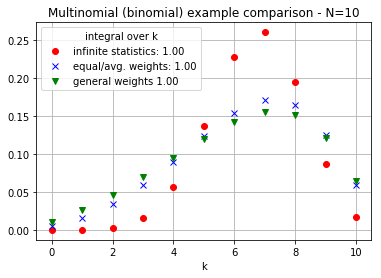

In [4]:
klist=numpy.arange(11)


pylab.plot(klist, numpy.exp(mnomial_standard_infinite), lw=0, marker="o", color="red", label="infinite statistics: %.2f" % infinite_sum)
pylab.plot(klist, numpy.exp(mnomial_equal_weights_per_bin), lw=0, marker="x", color="blue", label="equal/avg. weights: %.2f" % equal_weights_sum)
pylab.plot(klist, numpy.exp(mnomial_general_weights), lw=0, marker="v", color="green", label="general weights %.2f" % general_weights_sum)

pylab.title("Multinomial (binomial) example comparison - N=%d" % tot_k)
pylab.legend(loc="upper left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.show()

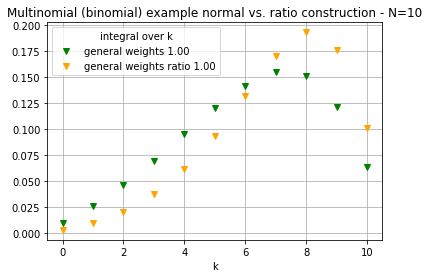

In [5]:
klist=numpy.arange(11)

pylab.plot(klist, numpy.exp(mnomial_general_weights), lw=0, marker="v", color="green", label="general weights %.2f" % general_weights_sum)
#pylab.plot(klist, numpy.exp(mnomial_ratio_equal_weights), lw=0, marker="v", color="purple", label="equal weights ratio %.2f" % ratio_equal_weights_sum)
pylab.plot(klist, numpy.exp(mnomial_ratio_general_weights), lw=0, marker="v", color="orange", label="general weights ratio %.2f" % ratio_general_weights_sum)

pylab.title("Multinomial (binomial) example normal vs. ratio construction - N=%d" % tot_k)
pylab.legend(loc="upper left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.show()

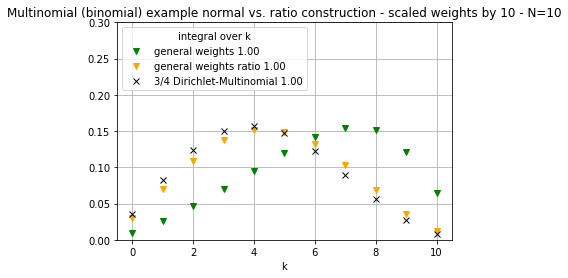

In [6]:
## now scale the MC events up artificially by a factor 100 (yet aain lower livetime)
scaling_factor=10.0
tot_k=10

## scaling all weights by factor of 10
mn_general_fn=mn_standard.log_multinomial_general_weights_generator(tot_k, [i*scaling_factor for i in weight_list], nthrows=10000, prior_factor=0.0)

mnomial_general_weights=[]
mnomial_ratio_equal_weights=[]
mnomial_ratio_general_weights=[]

dirichlet_multinomial=[]

for i in range(tot_k+1):
    k1=i
    k2=tot_k-i
    
    obs_k=numpy.array([k1,k2])
    

    mnomial_general_weights.append(mn_general_fn(obs_k))
    
    ## scaling all weights with factor of 10
    #mnomial_ratio_equal_weights.append(mn_standard.log_multinomial_poisson_ratio_equal_weights(obs_k, numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([scaling_factor*avg_w_1, scaling_factor*avg_w_2]), lauricella_calc="montecarlo"))
    mnomial_ratio_general_weights.append(mn_standard.log_multinomial_poisson_ratio_general_weights(obs_k, scaling_factor*total_weight_array, index_list))
    dirichlet_multinomial.append(mn_standard.log_DM(obs_k, numpy.array([3.0,4.0])))
    

klist=numpy.arange(11)

pylab.plot(klist, numpy.exp(mnomial_general_weights), lw=0, marker="v", color="green", label="general weights %.2f" % numpy.exp(mnomial_general_weights).sum())
#pylab.plot(klist, numpy.exp(mnomial_ratio_equal_weights), lw=0, marker="v", color="purple", label="equal weights ratio %.2f" % numpy.exp(mnomial_ratio_equal_weights).sum())
pylab.plot(klist, numpy.exp(mnomial_ratio_general_weights), lw=0, marker="v", color="orange", label="general weights ratio %.2f" % numpy.exp(mnomial_ratio_general_weights).sum())
pylab.plot(klist, numpy.exp(dirichlet_multinomial), lw=0, marker="x", color="black", label="3/4 Dirichlet-Multinomial %.2f" % numpy.exp(dirichlet_multinomial).sum())

pylab.title("Multinomial (binomial) example normal vs. ratio construction - scaled weights by 10 - N=%d" % tot_k)
pylab.legend(loc="upper left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.gca().set_ylim(0,0.3)
pylab.show()

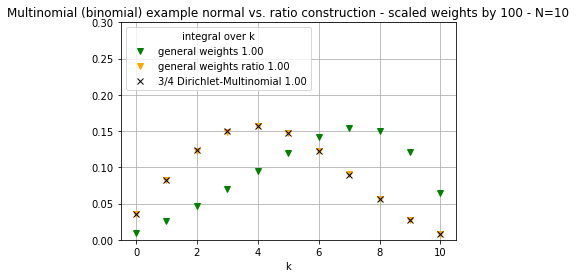

In [7]:
## now scale the MC events up artificially by a factor 100 (yet again lower livetime)
scaling_factor=100.0
tot_k=10

## scaling all weights by factor of 10
mn_general_fn=mn_standard.log_multinomial_general_weights_generator(tot_k, [i*scaling_factor for i in weight_list], nthrows=10000, prior_factor=0.0)

mnomial_general_weights=[]
mnomial_ratio_equal_weights=[]
mnomial_ratio_general_weights=[]

dirichlet_multinomial=[]

for i in range(tot_k+1):
    k1=i
    k2=tot_k-i
    
    obs_k=numpy.array([k1,k2])
    

    mnomial_general_weights.append(mn_general_fn(obs_k))
    
    ## scaling all weights with factor of 10
    #mnomial_ratio_equal_weights.append(mn_standard.log_multinomial_poisson_ratio_equal_weights(obs_k, numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([scaling_factor*avg_w_1, scaling_factor*avg_w_2]), lauricella_calc="montecarlo"))
    mnomial_ratio_general_weights.append(mn_standard.log_multinomial_poisson_ratio_general_weights(obs_k, scaling_factor*total_weight_array, index_list))
    dirichlet_multinomial.append(mn_standard.log_DM(obs_k, numpy.array([3.0,4.0])))
    

klist=numpy.arange(11)

pylab.plot(klist, numpy.exp(mnomial_general_weights), lw=0, marker="v", color="green", label="general weights %.2f" % numpy.exp(mnomial_general_weights).sum())
#pylab.plot(klist, numpy.exp(mnomial_ratio_equal_weights), lw=0, marker="v", color="purple", label="equal weights ratio %.2f" % numpy.exp(mnomial_ratio_equal_weights).sum())
pylab.plot(klist, numpy.exp(mnomial_ratio_general_weights), lw=0, marker="v", color="orange", label="general weights ratio %.2f" % numpy.exp(mnomial_ratio_general_weights).sum())
pylab.plot(klist, numpy.exp(dirichlet_multinomial), lw=0, marker="x", color="black", label="3/4 Dirichlet-Multinomial %.2f" % numpy.exp(dirichlet_multinomial).sum())

pylab.title("Multinomial (binomial) example normal vs. ratio construction - scaled weights by 100 - N=%d" % tot_k)
pylab.legend(loc="upper left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.gca().set_ylim(0,0.3)
pylab.show()


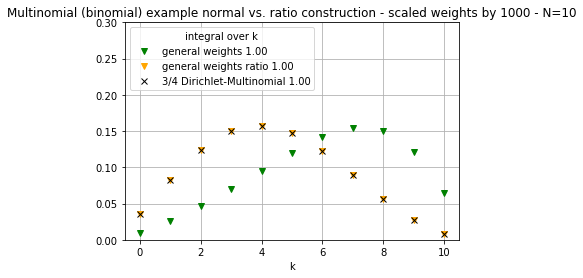

In [8]:
## now scale the MC events up artificially by a factor 100 (yet aain lower livetime)
scaling_factor=1000.0
tot_k=10

## scaling all weights by factor of 10
mn_general_fn=mn_standard.log_multinomial_general_weights_generator(tot_k, [i*scaling_factor for i in weight_list], nthrows=10000, prior_factor=0.0)

mnomial_general_weights=[]
mnomial_ratio_equal_weights=[]
mnomial_ratio_general_weights=[]

dirichlet_multinomial=[]

for i in range(tot_k+1):
    k1=i
    k2=tot_k-i
    
    obs_k=numpy.array([k1,k2])
    

    mnomial_general_weights.append(mn_general_fn(obs_k))
    
    ## scaling all weights with factor of 10
    #mnomial_ratio_equal_weights.append(mn_standard.log_multinomial_poisson_ratio_equal_weights(obs_k, numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([scaling_factor*avg_w_1, scaling_factor*avg_w_2]), lauricella_calc="montecarlo"))
    mnomial_ratio_general_weights.append(mn_standard.log_multinomial_poisson_ratio_general_weights(obs_k, scaling_factor*total_weight_array, index_list))
    dirichlet_multinomial.append(mn_standard.log_DM(obs_k, numpy.array([3.0,4.0])))
    

klist=numpy.arange(11)

pylab.plot(klist, numpy.exp(mnomial_general_weights), lw=0, marker="v", color="green", label="general weights %.2f" % numpy.exp(mnomial_general_weights).sum())
#pylab.plot(klist, numpy.exp(mnomial_ratio_equal_weights), lw=0, marker="v", color="purple", label="equal weights ratio %.2f" % numpy.exp(mnomial_ratio_equal_weights).sum())
pylab.plot(klist, numpy.exp(mnomial_ratio_general_weights), lw=0, marker="v", color="orange", label="general weights ratio %.2f" % numpy.exp(mnomial_ratio_general_weights).sum())
pylab.plot(klist, numpy.exp(dirichlet_multinomial), lw=0, marker="x", color="black", label="3/4 Dirichlet-Multinomial %.2f" % numpy.exp(dirichlet_multinomial).sum())

pylab.title("Multinomial (binomial) example normal vs. ratio construction - scaled weights by 1000 - N=%d" % tot_k)
pylab.legend(loc="upper left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.gca().set_ylim(0,0.3)
pylab.show()